# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./traffic-signs-data/train.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = format(len(X_train))

# TODO: Number of testing examples.
n_test = format(len(X_test))

# TODO: What's the shape of an traffic sign image?
image_shape = format(X_train[0].shape)

# TODO: How many unique classes/labels there are in the dataset.
n_classes = format(max(y_train)+1)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

8


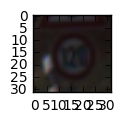

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import random
import numpy as np
import matplotlib.pyplot as plt

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
#plt.imshow(image, cmap="gray")
plt.imshow(image)
print(y_train[index])


# I should normalize the data hereafter:
##image2 = plt.hist(image)
#lum_img = image[:,:,0]
##plt.hist(lum_img.flatten(), 256, range=(0.0, 1.0), fc='k', ec='k')
#plt.hist(image.ravel(), bins=256, range=(0.0, 1.0))#, fc='k', ec='k')
#plt.figure(figsize=(1,1))
#image2 = plt.hist(lum_img.flatten(), 256, range=(0.0, 1.0), fc='k', ec='k')
#plt.imshow(image2)
#imgplot = plt.imshow(lum_img, clim=(0.0, 400.0))
##to review... the image ravel function action here seems a bit peculiar...


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [6]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.20, random_state=0) 




### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

For the fun of it, I shuffle the remaining training data. This is the original idea provided in the lectures, which makes sense because it can create a random list to split later.

Another method I will try out next is the tf.image.per_image_whitening() as a form of image normalization.  I will apply it only to the training data, and then check how the model is performing on validation data that has not been normalized.  





In [7]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I take the training data, and use the train_test_split function to save a portion as my validation set.  The test data loaded previously is only meant to be used at the very end for computing the final efficiency of the network.


In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

#setup of TensorFlow batch size and Epochs for the network training
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128


#Network implementation, using LeNet solution as a starting point:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    keep_prob = 0.5
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    #conv1 = tf.nn.dropout(conv1, keep_prob) #applying dropout

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    #conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv1 = tf.nn.avg_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    #conv2 = tf.nn.dropout(conv2, keep_prob)#applying dropout

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    #conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv2 = tf.nn.avg_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    #fc1    = tf.nn.dropout(fc1, keep_prob)#applying dropout

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    #fc2 = tf.nn.dropout(fc2, keep_prob)#applying dropout --> model accuracy on first run goes from 95% to 90%.  Don't use Dropout on the final layer!
    #logits_fc2 = tf.add(tf.matmul(fc2, fc2_W), fc2_b)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    #logits = tf.matmul(fc2, fc3_W) + fc3_b
    #logits = tf.matmul(logits_fc2,fc3_W)+fc3_b
    logits = tf.matmul(fc2,fc3_W)+fc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
My final architecture is built from LeNet's lab solution. It's a very good start, especially since I want to maintain as few weights as possible in my network. The main reason is because I am running my code on my local (older) CPU instead of on a distant GPU.  It is important for me to keep the quantity of network weights to a minimum, without which my computer would take too much time to process.

Architecture:
Layer 1: 
Convolutional. Input = 32x32x3. Output = 28x28x6
Activation. relu
Pooling. average. Input = 28x28x6. Output = 14x14x6.

Layer 2:
Convolutional. Output = 10x10x16
Activation. relu
Pooling. average. Input = 10x10x16. Output = 5x5x16.

Layer 3: 
Fully Connected ("normal neural network"). Input = 400. Output = 120.
Activation. drop out

Layer 4:
Fully Connected. Input = 120. Output = 84.
Activation. drop out

Layer 5: 
Fully Connected. Input = 84. Output = 43.











In [9]:
### Train your model here.
### Feel free to use as many code cells as needed.

#Features and Labels train here:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [10]:
#Training Pipeline

rate = 0.001
#global_step = tf.Variable(0, trainable=False)
#boundaries = [5, 10]
#values = [0.001, 0.0005, 0.0001]
#rate = tf.train.piecewise_constant(global_step, boundaries, values)
#print("Learning rate= {:.3f}".format(rate))


logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


In [11]:
#Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [12]:
#Train the Model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
    
        #X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './traffic-signs-save/TS_saved')
    print("Model saved")
    
    #once all is said and done, test accuracy on the training set specifically put asside for this purpose:
    test_accuracy = evaluate(X_test, y_test)
    print("Computing Test Accuracy")
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print()    

    
   # print("Session time {}".format(time.clock()-tic))

Training...

EPOCH 1 ...
Validation Accuracy = 0.702

EPOCH 2 ...
Validation Accuracy = 0.857

EPOCH 3 ...
Validation Accuracy = 0.904

EPOCH 4 ...
Validation Accuracy = 0.917

EPOCH 5 ...
Validation Accuracy = 0.941

EPOCH 6 ...
Validation Accuracy = 0.949

EPOCH 7 ...
Validation Accuracy = 0.952

EPOCH 8 ...
Validation Accuracy = 0.954

EPOCH 9 ...
Validation Accuracy = 0.959

EPOCH 10 ...
Validation Accuracy = 0.963

Model saved
Computing Test Accuracy
Test Accuracy = 0.881



### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
I have started off with the LeNet lab solution.  When running it on my computer with the default settings - tuned to accomodate color images - the result after 10 Epochs was regularly achieving an accuracy around 95%.  

I have tested with Activation = dropout for layers 1 and 2, with the remainder Activations being relus.  Surprisingly, this has reduced the performance of the network by a whopping 8 - 10 percent with respect to the LeNet solution (all Activations are relus), around 85% down from 95%. There was no notable improvement either when I have increased the number of Epochs from 10 to 15, or when I have replaced the max pooling operators with average pooling operators. It looks like a Convolution layer and Dropout do not work ideally together, if I want to keep the number of Epochs required for learning low.

I have then tested with Activation = dropout for the fully connected layers 3 and 4.  This would make more sense, since in the lectures, this is how dropout was introduced.  For this test, I am keeping the total number of epochs to 15. 

The resulting difference between using Epoch=10 and Epoch=15 was gaining 1% accuracy on the validation dataset. The total validation accuracy at Epoch 15 was 97.4% on that specific run.  However the overall test accuracy came to 90.5% In order to check if the network was overfitting the data, I have reverted the number of Epochs back to 10.  The total validation accuracy came into 96% and the accuracy of the test data was 87.3%.  This confirms on the contrary that the network has benefitted of the 5 additional Epoch runs to continue learning.

The question popped up to use grayscale (or image reduction to one channel instead of three).  This does have the added benefit of reducing the input image depth by 3, although I expect this to only provide a small computational advantage for running the batches through the first layer in the network (since there is no additional impact on the network dimensions).


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

<class 'numpy.ndarray'>
3072
3072
3072
3072
3072
3072
6
32
32
3
<class 'numpy.ndarray'>


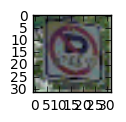

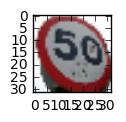

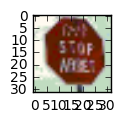

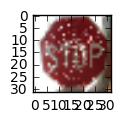

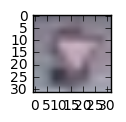

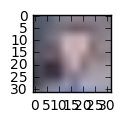

In [14]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import skimage.data as skdata
import skimage.transform as sktrans
import skimage.io as io
#from skimage.io import ImageCollection.concatenate as concatenate

#loading the images into the Jupyter notebook
Image_1 = skdata.load('D:\\Udacity_CarND\\CarND-Traffic-Sign-Classifier-Project\\CarND-Traffic-Sign-Classifier-Project\\web_pics\\Park_1.bmp')
Image_2 = skdata.load('D:\\Udacity_CarND\\CarND-Traffic-Sign-Classifier-Project\\CarND-Traffic-Sign-Classifier-Project\\web_pics\\speed_50.bmp')
Image_3 = skdata.load('D:\\Udacity_CarND\\CarND-Traffic-Sign-Classifier-Project\\CarND-Traffic-Sign-Classifier-Project\\web_pics\\stop_1.bmp')
Image_4 = skdata.load('D:\\Udacity_CarND\\CarND-Traffic-Sign-Classifier-Project\\CarND-Traffic-Sign-Classifier-Project\\web_pics\\stop_2.bmp')
Image_5 = skdata.load('D:\\Udacity_CarND\\CarND-Traffic-Sign-Classifier-Project\\CarND-Traffic-Sign-Classifier-Project\\web_pics\\yield.bmp')
Image_6 = skdata.load('D:\\Udacity_CarND\\CarND-Traffic-Sign-Classifier-Project\\CarND-Traffic-Sign-Classifier-Project\\web_pics\\yield2.bmp')

#resizing the images to 32x32x3
new_size = (32,32)
Image_1 = sktrans.resize(Image_1,(32,32,3,1))
Image_2 = sktrans.resize(Image_2,(32,32,3,1))
Image_3 = sktrans.resize(Image_3,(32,32,3,1))
Image_4 = sktrans.resize(Image_4,(32,32,3,1))
Image_5 = sktrans.resize(Image_5,(32,32,3,1))
Image_6 = sktrans.resize(Image_6,(32,32,3,1))

#checking that the resize operation worked correctly: 32*32*3 = 3072
print(type(Image_1))
print(Image_1.size)
print(Image_2.size)
print(Image_3.size)
print(Image_4.size)
print(Image_5.size)
print(Image_6.size)

#Plotting the images that have been resized:
plt.figure(figsize=(1,1))
#plt.imshow(image, cmap="gray")
plt.imshow(Image_1)
plt.figure(figsize=(1,1))
plt.imshow(Image_2)
plt.figure(figsize=(1,1))
plt.imshow(Image_3)
plt.figure(figsize=(1,1))
plt.imshow(Image_4)
plt.figure(figsize=(1,1))
plt.imshow(Image_5)
plt.figure(figsize=(1,1))
plt.imshow(Image_6)

#packing the images into a bundle, and check the dimensions and resulting type:
Image_bundle = io.ImageCollection.concatenate((Image_1,Image_2,Image_3,Image_4,Image_5,Image_6))
print(len(Image_bundle[:,:,:,:]))
print(len(Image_bundle[0,:,:,:]))
print(len(Image_bundle[0,0,:,:]))
print(len(Image_bundle[0,0,0,:]))
print(type(Image_bundle))


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

The internet search for images turned out to be surprizingly difficult at first: road sign types would only come up with pixel perfect symbolic signs, whereas images in places tagged in google maps were also mostly free of signs.  It turns out that people all over tend to try to keep street signs out of their photos when taking an "artistic" or "touristic" shot. I had better luck in finding more appropriate images when searching for "damaged" signs.

It is quite obvious that a sign whose type has not been identified among the 43 classes reported within my classifier will in a way add noise to the weights of the network. I am curious to see in a next step how a classifier could organically add new classes to its network?  Therefore the "damaged"  no-parking sign was the only image without a class that I have chosen in this category.  The other images (50km/h speed limit, stop signs and yield signs) are poor examples of classes the network should be able to recognize.

The characteristics of one of the stop signs and the 50km/h speed limit have the characteristics of being photographed from a side, and have additional (bullet) holes around the important features of the signs.

The second stop sign is simultaneously translated into several other languages.  The additional letters are expected to act as additional noise to the original sign.

In [22]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

#reloading the graph pipeline
#removing the previous Weight and Bias (W&B):
tf.reset_default_graph()

logits = LeNet(x)


Softmax_prob = tf.nn.softmax(logits)
image = tf.placeholder(tf.float32, (1,32, 32, 3))
with tf.Session() as sess:
    #this here is to restore the W&B
    saver.restore(saver,sess, './traffic-signs-save/TS_saved')
    print("Model restored")
    num_examples = len(Image_bundle)
    print(num_examples)
    #for i in range(0, num_examples,1):
    #    image = Image_bundle[i,:,:,:]
    #    print(type(image))
    logits = sess.run(logits, feed_dict={x: Image_bundle})    
        #plt.imshow(image)
        #plt.figure(figsize=(1,1))
    #    logits = sess.run(logits, feed_dict={x: Image_bundle[i]})
    softmaxRes = sess.run(Softmax_prob, feed_dict={x: logits})
    print (softmaxRes)


ValueError: Tensor("Placeholder:0", shape=(?, 32, 32, 3), dtype=float32) must be from the same graph as Tensor("Variable:0", shape=(5, 5, 3, 6), dtype=float32_ref).

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.